In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import cleaner
import utils.plotter as plotter

## Training, Validation, and Test

In [2]:
date = '19-May-2022'
agg_trade = cleaner.clean_agg_trade('./input_data/'+date+'/aggTrade.csv')

IndexError: list assignment index out of range

## Visualizing Data

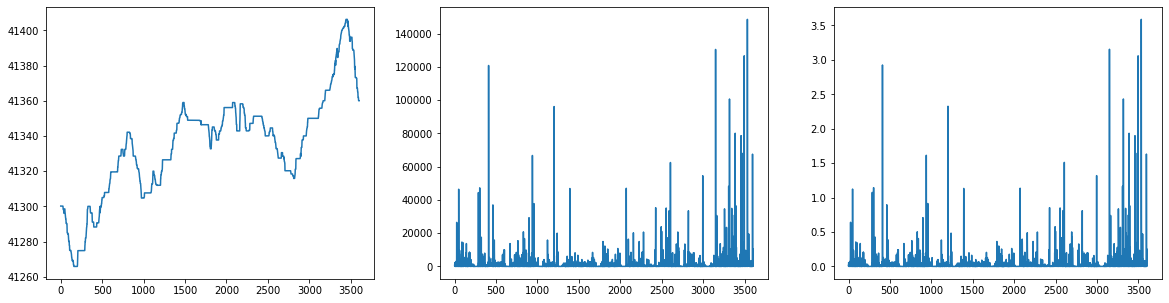

In [76]:
prices = agg_trade.price.to_list()
dollarvolume = agg_trade.dollarvolume.to_list()
quantity = agg_trade.quantity.to_list()

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].plot(prices)
ax[1].plot(dollarvolume)
ax[2].plot(quantity)

In [77]:
# Sample data based on dollar volume
timestamp, price, quantity = cleaner.group_by_dollarvol(agg_trade.index, prices, quantity, np.mean(agg_trade.dollarvolume))

In [78]:
trades = pd.DataFrame({'datetime':timestamp, 'price':price, 'quantity':quantity})
trades.to_csv('./input_data/'+date+'/aggTrade_dollarvol.csv', index=False)

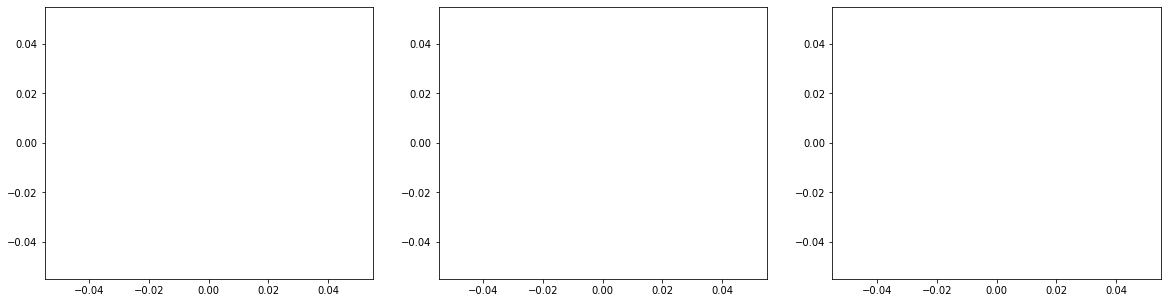

In [79]:
fig2, ax2 = plt.subplots(1, 3, figsize = (20, 5))

ax2[0].plot(np.log(price[5000:5150]))
ax2[1].plot(np.log(price[50000:50150]))
ax2[2].plot(np.log(price[600000:600150]))

(array([1221,  834, 3269, 4821, 2285,   61,  446, 1721, 1520, 2843, 2659,
           3,    0,    0,    6,    7,    0,   28,  193,  587,  615,  250,
         123,  111,  113,   88,   24,    3,  110, 1489, 1470,  155, 1293,
        1423,  360,  261,  112,   19,    2,    0,    1,   17,  491,  796,
         805,  891,  475,  102,   49,   45,  544,  551,   66,  569, 1883,
        1866, 3285, 4112, 1379,  460,  486,   72,  191,  183,  679,  674,
           1,    6,    7,  173,  372,  198,    0,    0,    0,  206,  243,
         886, 1684, 1230,  759,  363,  731,  897, 2610, 3129, 1259, 3667,
        6040, 3440, 1496, 1722, 1637, 1113,  442,  581,  688,  385,  102,
         370,  372,  319,  896,  680,   62,  178,  527,  411,   30,    0,
           0,    0,    7,   25,   23,    5,    2,    2,    1,    1,    7,
          38,  779,  805,  928, 1094,  673,  619,  177,  247,  270,  172,
         418,  556,  306,   53,   40,  389, 2505, 2145,   59,  262,  246,
         148,  220,  142,   57,  438, 

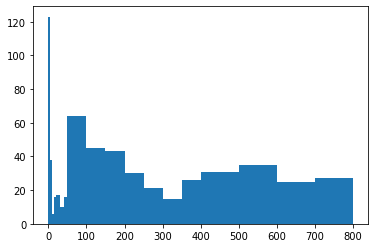

In [80]:
plotter.timediff(timestamp)

In [ ]:
bookticker = pd.read_csv('./input_data/'+date+'/bookticker.csv')
bookticker_clean = cleaner.clean_bookticker('./input_data/'+date+'/bookticker.csv')

## Aggregating Data by Dollar Volume

In [2]:
dates = ['09-Jun-2022','10-Jun-2022','11-Jun-2022','12-Jun-2022','13-Jun-2022','14-Jun-2022','16-Jun-2022','17-Jun-2022']
  

In [3]:
agg_trade_orderbook = []

for date in dates:
  agg_trade_orderbook.append(pd.read_csv(f'./input_data/{date}/orderbook_agg_trade.csv'))

IndexError: list index out of range

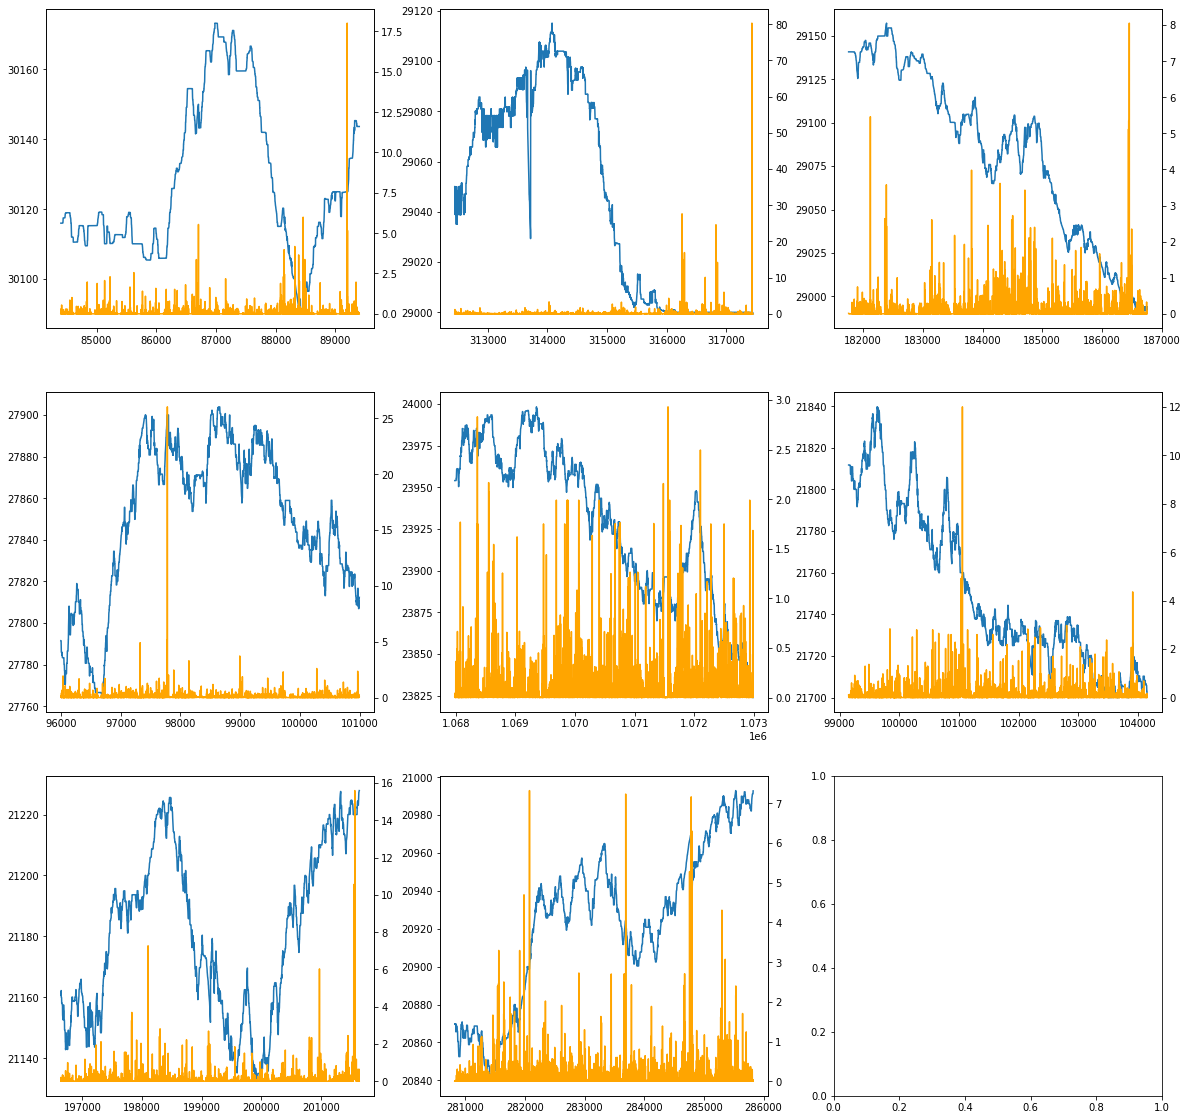

In [6]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(agg_trade_orderbook[plot_idx])-5000, size=1)
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(agg_trade_orderbook[plot_idx].price[rand[0]:rand[0]+5000])
    ax2.plot(agg_trade_orderbook[plot_idx].quantity[rand[0]:rand[0]+5000], color='orange')
    plot_idx += 1


In [16]:
for idx in range(len(dates)):
  mean_price = np.mean(agg_trade_orderbook[idx].price)
  std_price = np.std(agg_trade_orderbook[idx].price)
  mean_qty = np.mean(agg_trade_orderbook[idx].quantity)
  std_qty = np.std(agg_trade_orderbook[idx].quantity)
  mean_dollarvol =  np.mean(agg_trade_orderbook[idx].price*agg_trade_orderbook[idx].quantity)
  std_dollarvol =  np.std(agg_trade_orderbook[idx].price*agg_trade_orderbook[idx].quantity)
  print(f'| date: {dates[idx]} | mean price: {mean_price:0.2f} ~ {std_price:0.2f} | \
mean qty {mean_qty:0.5f} ~ {std_qty:0.5f} | mean dollar vol {mean_dollarvol:0.2f} ~ {std_dollarvol:0.2f}|')

| date: 09-Jun-2022 | mean price: 30172.24 ~ 101.10 | mean qty 0.06442 ~ 0.28546 | mean dollar vol 1943.65 ~ 8610.11|
| date: 10-Jun-2022 | mean price: 29503.10 ~ 452.35 | mean qty 0.07477 ~ 0.56567 | mean dollar vol 2207.80 ~ 16889.54|
| date: 11-Jun-2022 | mean price: 29019.41 ~ 265.96 | mean qty 0.07712 ~ 0.68491 | mean dollar vol 2232.40 ~ 19665.93|
| date: 12-Jun-2022 | mean price: 27603.43 ~ 437.59 | mean qty 0.08997 ~ 0.36752 | mean dollar vol 2478.94 ~ 10097.94|
| date: 13-Jun-2022 | mean price: 24284.26 ~ 1118.95 | mean qty 0.10013 ~ 0.36758 | mean dollar vol 2444.70 ~ 9042.60|
| date: 14-Jun-2022 | mean price: 22090.03 ~ 558.12 | mean qty 0.10364 ~ 0.39003 | mean dollar vol 2287.90 ~ 8606.73|
| date: 16-Jun-2022 | mean price: 20901.99 ~ 272.61 | mean qty 0.07861 ~ 0.29286 | mean dollar vol 1640.02 ~ 6085.78|
| date: 17-Jun-2022 | mean price: 20808.65 ~ 250.80 | mean qty 0.09189 ~ 0.32087 | mean dollar vol 1911.66 ~ 6667.91|


In [22]:
agg_trade_orderbook_all = pd.concat(agg_trade_orderbook)

agg_trade_orderbook_all['dollarvol'] = agg_trade_orderbook_all.quantity * agg_trade_orderbook_all.price

bid_cols = ['bid'+str(i) for i in range(1,11)]+['bidqty'+str(i) for i in range(1,11)]
ask_cols = ['ask'+str(i) for i in range(1,11)]+['askqty'+str(i) for i in range(1,11)]

bid_ask_cols = bid_cols+ask_cols

cols_dict = {'price':'price',
             'quantity':'quantity',
             'datetime':'datetime_y',
             'bid_ask_columns':bid_ask_cols}

median_dollar_vol = np.median(agg_trade_orderbook_all['dollarvol'])
mean_dollar_vol = np.mean(agg_trade_orderbook_all['dollarvol'])

orderbook_clean_dollarvol_all = cleaner.group_book_by_dollarvol2(agg_trade_orderbook_all, cols_dict, mean_dollar_vol)

In [26]:
orderbook_clean_dollarvol_all.to_csv('./input_data/all/orderbook_agg_trade_dollarvol.csv', index=False)

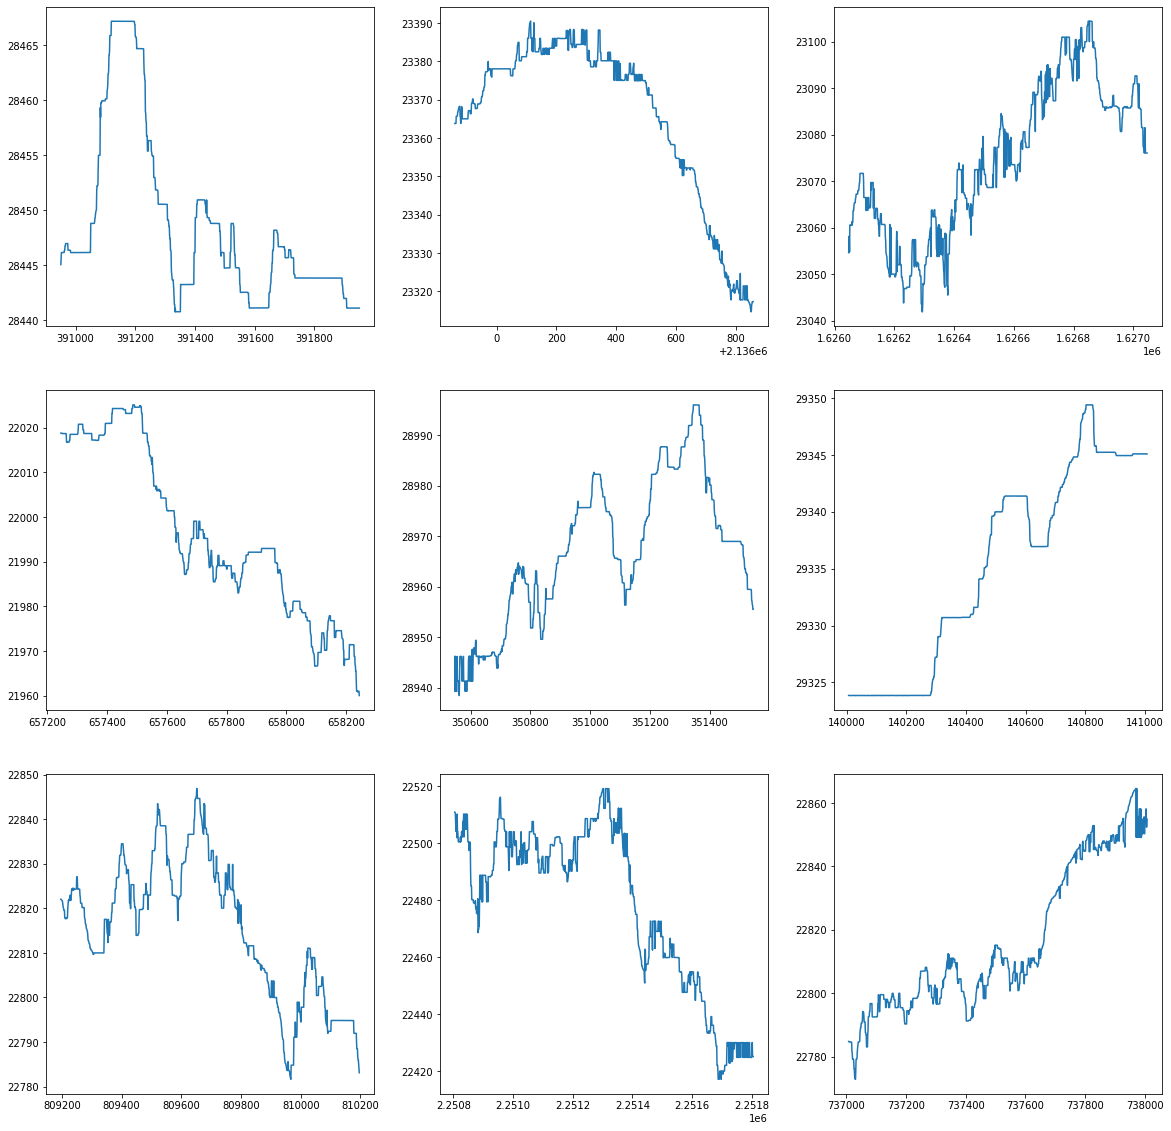

In [30]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(agg_trade_orderbook_all)-1000, size=1)
    ax[idx][jdx].plot(agg_trade_orderbook_all.price[rand[0]:rand[0]+1000])
    plot_idx += 1

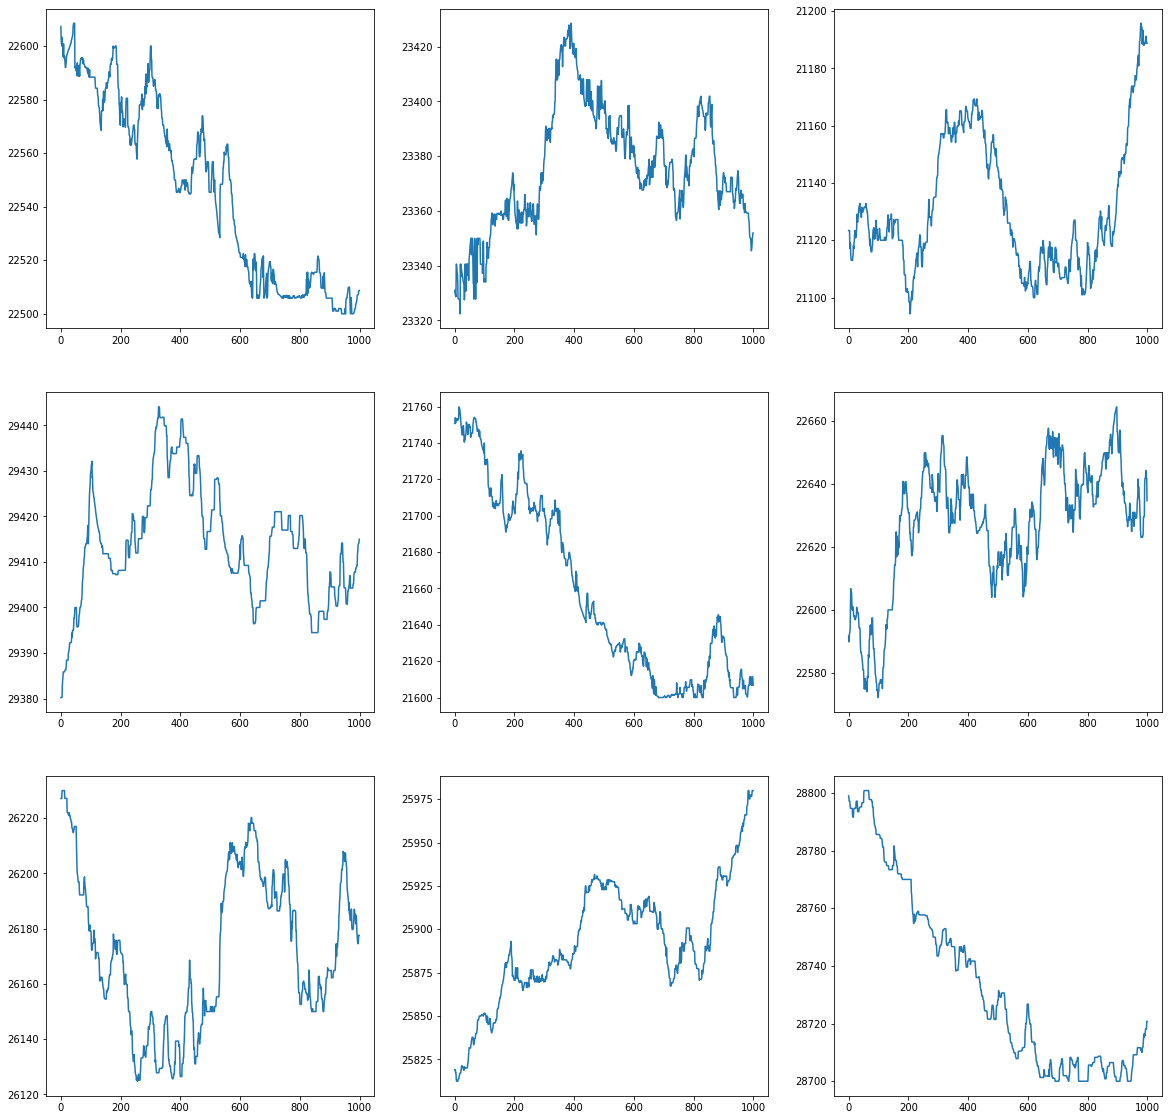

In [31]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_clean_dollarvol_all)-1000, size=1)
    ax[idx][jdx].plot(orderbook_clean_dollarvol_all.price.to_list()[rand[0]:rand[0]+1000])
    plot_idx += 1

## Exploring LOB 

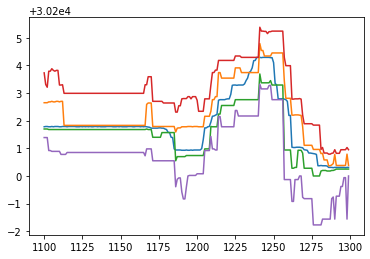

In [21]:
plt.plot(agg_trade_orderbook_all.price[1100:1300])
plt.plot(agg_trade_orderbook_all.ask5[1100:1300])
plt.plot(agg_trade_orderbook_all.bid5[1100:1300])
plt.plot(agg_trade_orderbook_all.ask10[1100:1300])
plt.plot(agg_trade_orderbook_all.bid10[1100:1300])


In [5]:
for idx in range(len(dates)):
  agg_trade_orderbook[idx]['dollarvol'] = agg_trade_orderbook[idx].quantity * agg_trade_orderbook[idx].price

In [6]:
print(np.mean(agg_trade_orderbook[0]['dollarvol']))
print(np.std(agg_trade_orderbook[0]['dollarvol']))

1943.6457651619896
8610.11137619239


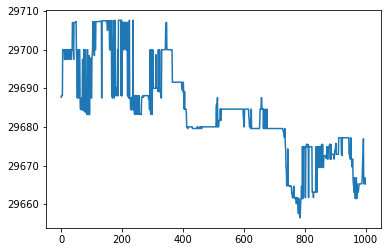

In [7]:
plt.plot(agg_trade_orderbook[1]['price'][:1000])

In [8]:
orderbook_clean_dollarvol = []

bid_cols = ['bid'+str(i) for i in range(1,11)]+['bidqty'+str(i) for i in range(1,11)]
ask_cols = ['ask'+str(i) for i in range(1,11)]+['askqty'+str(i) for i in range(1,11)]

bid_ask_cols = bid_cols+ask_cols

cols_dict = {'price':'price',
             'quantity':'quantity',
             'datetime':'datetime_y',
             'bid_ask_columns':bid_ask_cols}

for idx in range(len(dates)):
  median_dollar_vol = np.median(agg_trade_orderbook[idx]['dollarvol'])
  mean_dollar_vol = np.mean(agg_trade_orderbook[idx]['dollarvol'])

  orderbook_clean_dollarvol.append(cleaner.group_book_by_dollarvol2(agg_trade_orderbook[idx], cols_dict, mean_dollar_vol))

In [9]:
for idx, date in enumerate(dates):
  orderbook_clean_dollarvol[idx].to_csv(f'./input_data/{date}/orderbook_agg_trade_dollarvol.csv', index=False)
  
orderbook_clean_dollarvol[0]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty1,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10
2022-06-09 17:20:46.111,2022-06-09 17:20:46.111,30210.150000,1.67972,30210.14000,30210.08500,30210.02000,30209.98000,30209.95500,30209.885001,30209.445001,...,34.21224,1.04000,1.00000,0.53090,0.02366,0.21689,3.77362,0.06800,1.73791,4.05573
2022-06-09 17:20:46.843,2022-06-09 17:20:46.843,30210.140000,0.06924,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,14.31966,0.52000,0.50000,0.34908,0.01456,0.34908,0.09642,0.00300,0.01200,0.33096
2022-06-09 17:20:47.213,2022-06-09 17:20:47.213,30210.150000,0.32538,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,39.91077,1.35397,1.51000,1.12270,0.21094,0.87998,0.41559,0.05571,0.03150,0.17548
2022-06-09 17:20:47.559,2022-06-09 17:20:47.559,30210.150000,0.20355,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,5.55148,0.26000,0.25000,0.17454,0.00728,0.17454,0.04821,0.00150,0.00600,0.00100
2022-06-09 17:20:47.741,2022-06-09 17:20:47.741,30210.150000,0.24942,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,5.55148,0.26000,0.25000,0.17454,0.00728,0.17454,0.04821,0.00150,0.00600,0.00100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10 00:59:54.276,2022-06-10 00:59:54.276,30106.120000,0.25611,30106.11000,30106.10000,30106.09000,30105.99000,30105.98000,30105.950000,30105.200000,...,0.45245,0.24629,0.00066,0.10000,1.24300,1.44926,0.33248,0.33247,0.00182,0.16621
2022-06-10 00:59:54.297,2022-06-10 00:59:54.297,30106.120000,0.19633,30106.11000,30106.10000,30106.09000,30105.99000,30105.98000,30105.950000,30105.200000,...,0.45245,0.24629,0.00066,0.10000,1.24300,1.44926,0.33248,0.33247,0.00182,0.16621
2022-06-10 00:59:54.454,2022-06-10 00:59:54.454,30106.213355,0.24259,30106.16875,30106.14750,30106.13375,30106.10500,30106.06125,30106.047501,30105.937503,...,0.70060,0.98762,1.39151,3.16894,8.04476,3.29226,9.23974,9.02985,0.02773,1.19914
2022-06-10 00:59:54.960,2022-06-10 00:59:54.960,30106.618534,0.06706,30106.24625,30106.23625,30106.22625,30106.20875,30106.19875,30106.175000,30106.165000,...,0.49415,0.00412,3.80000,7.06784,4.86784,5.37200,11.38782,1.46200,0.10675,6.61592


In [13]:
orderbook_clean_dollarvol[1]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty1,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10
2022-06-10 01:16:50.730,2022-06-10 01:16:50.730,29687.942195,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.05768,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
2022-06-10 01:16:50.737,2022-06-10 01:16:50.737,29688.090000,0.11068,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.05768,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
2022-06-10 01:16:50.755,2022-06-10 01:16:50.755,29694.318930,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.08652,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000
2022-06-10 01:16:50.771,2022-06-10 01:16:50.771,29700.000000,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.02884,0.20000,0.43205,0.25000,0.25000,0.25000,0.25000,0.25000,0.25000,0.25000
2022-06-10 01:16:50.777,2022-06-10 01:16:50.777,29700.000000,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.05768,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11 00:59:55.943,2022-06-11 00:59:55.943,29090.000000,0.92435,29089.990000,29089.980000,29089.910000,29089.760000,29089.750000,29089.740000,29089.700000,...,2.98910,0.00300,0.01000,0.01000,0.20393,0.16332,0.00300,0.01000,0.42849,0.68077
2022-06-11 00:59:55.959,2022-06-11 00:59:55.959,29091.042044,0.22729,29089.990000,29089.980000,29089.910000,29089.760000,29089.750000,29089.740000,29089.700000,...,14.94550,0.01500,0.05000,0.05000,1.01965,0.81660,0.01500,0.05000,2.14245,3.40385
2022-06-11 00:59:57.008,2022-06-11 00:59:57.008,29091.189923,0.09268,29091.031255,29091.015005,29090.967506,29090.921256,29090.755004,29090.535003,29090.467503,...,17.33439,2.02224,4.68485,0.04500,1.11091,4.32425,5.05520,0.04500,0.48449,0.71577
2022-06-11 00:59:58.062,2022-06-11 00:59:58.062,29091.190000,0.08835,29091.180000,29091.170000,29091.120000,29091.110000,29090.950000,29090.800000,29090.600000,...,0.95643,0.02993,0.00300,0.00750,0.42849,0.00250,1.00924,0.00300,0.00750,0.00250


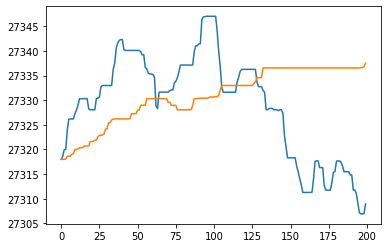

In [14]:
plt.plot(orderbook_clean_dollarvol[3]['price'][:200].to_list())
plt.plot(agg_trade_orderbook[3]['price'][:200].to_list())

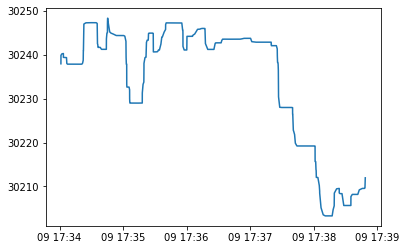

In [141]:
plt.plot(orderbook_clean_dollarvol[0].price[1100:1500])

In [145]:
orderbook_clean_dollarvol[1] = orderbook_clean_dollarvol[1].assign(
    vwap=orderbook_clean_dollarvol[1].eval(
        'wgtd = price * quantity', inplace=False
    ).groupby(orderbook_clean_dollarvol[1].index.date).cumsum().eval('wgtd / quantity')
)

orderbook_clean_dollarvol[1] 

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10,vwap
2022-06-10 01:16:50.731,2022-06-10 01:16:50.731,29687.991463,0.12000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,29687.991463
2022-06-10 01:16:50.740,2022-06-10 01:16:50.740,29688.090000,0.10884,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,29688.038329
2022-06-10 01:16:50.758,2022-06-10 01:16:50.758,29700.000000,0.12184,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,29692.194283
2022-06-10 01:16:50.780,2022-06-10 01:16:50.780,29699.166942,0.12100,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.80000,1.72820,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,29693.982978
2022-06-10 01:16:50.793,2022-06-10 01:16:50.793,29698.024159,0.18524,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,29695.122521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10 09:52:11.002,2022-06-10 09:52:11.002,30043.376366,0.20287,30045.000000,30044.950000,30044.930000,30043.820000,30043.370000,30043.080000,30043.070000,...,22.89050,5.88768,0.66638,0.02512,1.32560,5.48764,0.50590,0.66634,0.79800,30011.660517
2022-06-10 09:52:11.030,2022-06-10 09:52:11.030,30042.323365,0.17332,30045.000000,30044.950000,30044.930000,30043.820000,30043.370000,30043.080000,30043.070000,...,22.89050,5.88768,0.66638,0.02512,1.32560,5.48764,0.50590,0.66634,0.79800,30011.660789
2022-06-10 09:52:11.670,2022-06-10 09:52:11.670,30040.205912,0.09190,30040.285061,30040.260060,30040.103399,30039.636753,30039.253432,30039.166756,30038.800074,...,4.31970,29.45468,17.29424,88.34045,29.55008,33.74224,7.55196,16.36936,19.29941,30011.660923
2022-06-10 09:52:12.289,2022-06-10 09:52:12.289,30038.990000,0.16630,30038.990000,30038.950000,30038.900000,30037.890000,30037.590000,30037.450000,30037.130000,...,0.00320,0.25000,0.33329,7.98140,12.92453,0.33140,3.34018,0.00732,0.78085,30011.661156


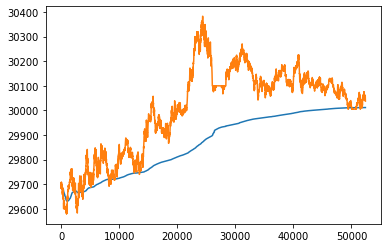

In [147]:
plt.plot(orderbook_clean_dollarvol[1].vwap.to_list()[:])
plt.plot(orderbook_clean_dollarvol[1].price.to_list()[:])


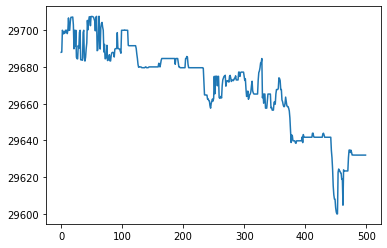

In [149]:
plt.plot(orderbook_clean_dollarvol[1].price.to_list()[:500])

## Orderbook

In [2]:
dates = ['09-Jun-2022','10-Jun-2022','11-Jun-2022','12-Jun-2022','13-Jun-2022','14-Jun-2022','16-Jun-2022','17-Jun-2022']
dates = ['21-Jul-2022','22-Jul-2022']


orderbook = []

for idx, date in enumerate(dates):
    orderbook.append(pd.read_csv(f'./input_data/{date}/orderbook.csv'))

In [12]:
for idx, date in enumerate(dates):
    orderbook[idx]['w_midprice'] = (orderbook[idx]['ask1']*orderbook[idx]['askqty1']+orderbook[idx]['bid1']*orderbook[idx]['bidqty1'])/(orderbook[idx]['askqty1']+orderbook[idx]['bidqty1'])

orderbook_all = pd.concat(orderbook)

In [13]:
orderbook_all.index = orderbook_all['datetime']

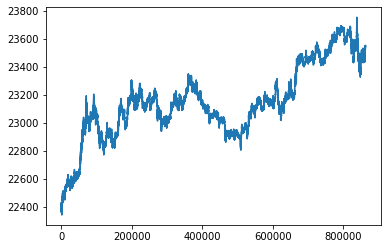

In [5]:
plt.plot(orderbook_all.w_midprice.to_list())

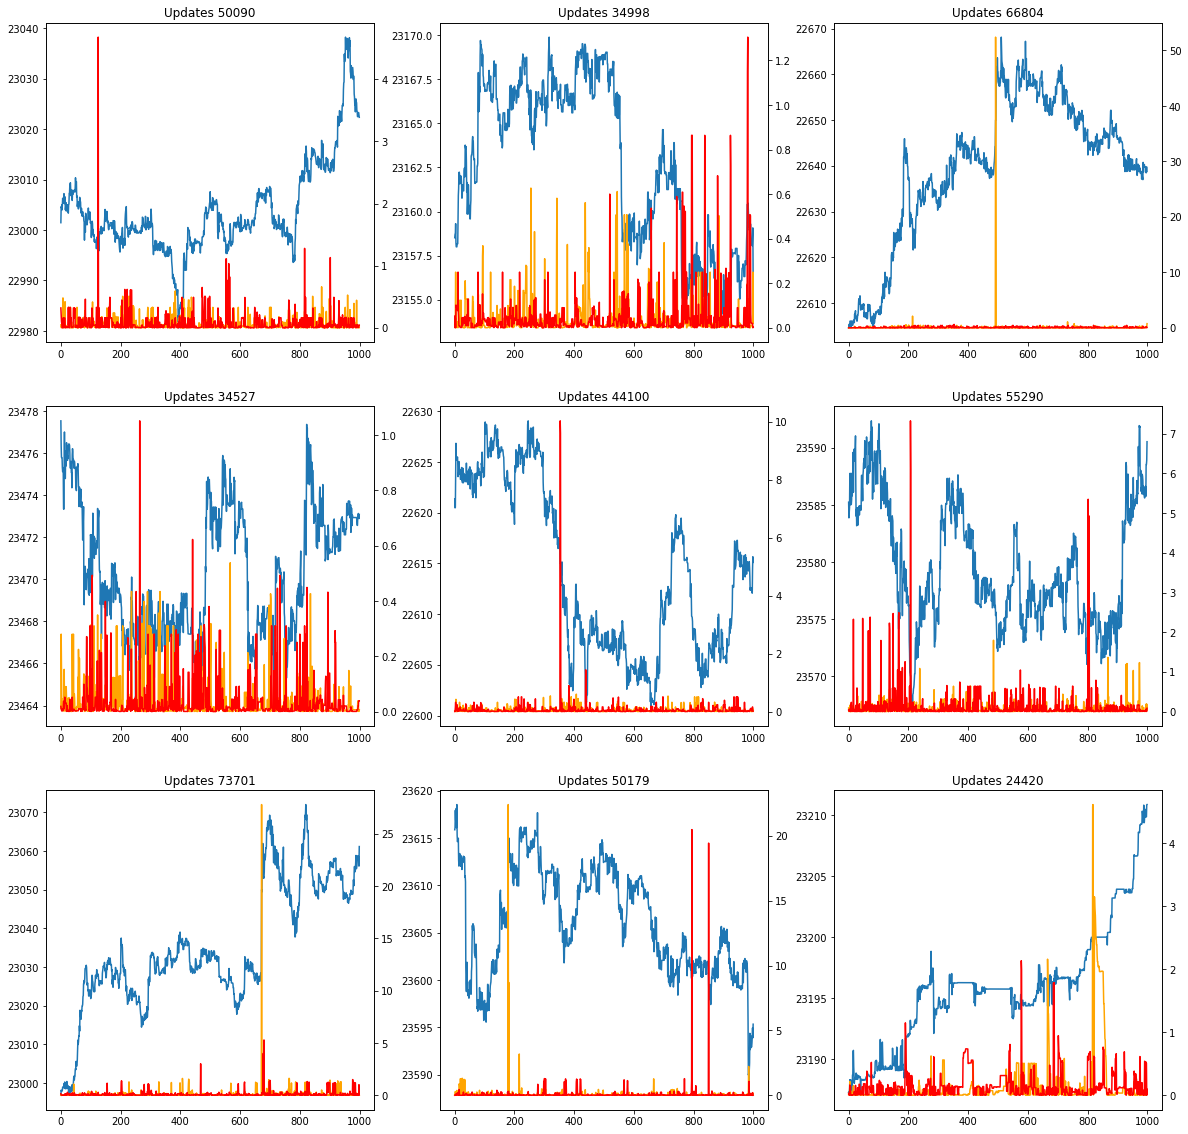

In [6]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all)-1000, size=1)
    # duration = (datetime.datetime.strptime(orderbook_all.datetime[rand[0]+1000],'%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(orderbook_all.datetime[rand[0]],'%Y-%m-%d %H:%M:%S.%f')).seconds 
    updates = orderbook_all.lastUpdatedId[rand[0]+1000]-orderbook_all.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange')
    ax2.plot(orderbook_all.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red')
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

In [7]:
orderbook_all['update_diff'] = orderbook_all['lastUpdatedId'] - orderbook_all['lastUpdatedId'].shift(1)


In [82]:
orderbook_all.to_csv('./input_data/all/orderbook_test.csv')

In [75]:
orderbook_all_active = orderbook_all[orderbook_all['update_diff'] > 9]

In [81]:
orderbook_all_active.to_csv('./input_data/all/orderbook_active.csv')

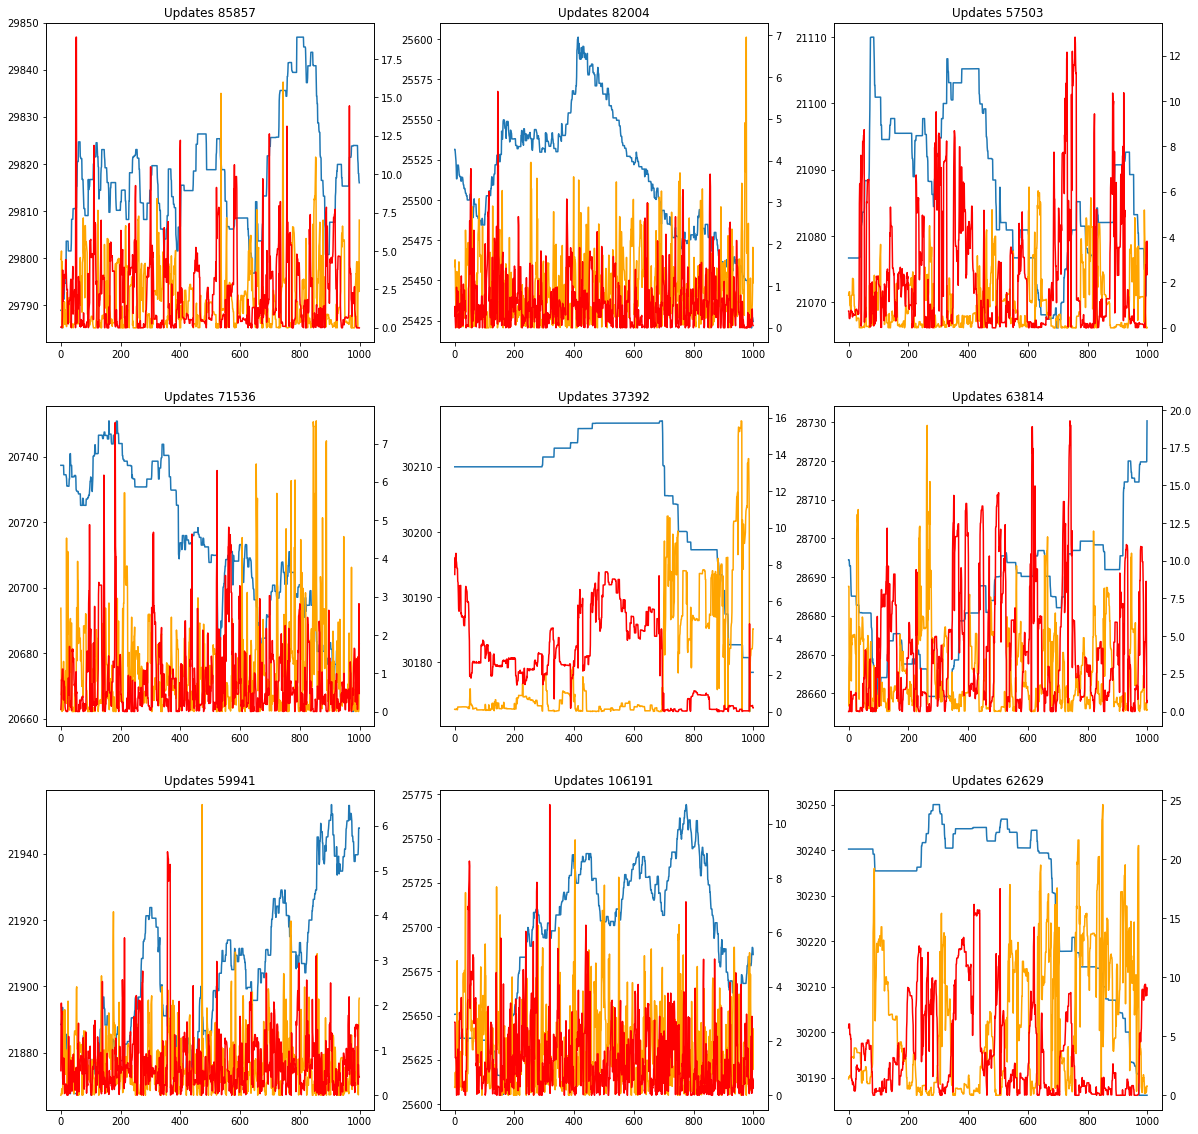

In [77]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all_active)-1000, size=1)
    updates = orderbook_all_active.lastUpdatedId[rand[0]+1000]-orderbook_all_active.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all_active.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all_active.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange')
    ax2.plot(orderbook_all_active.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red')
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

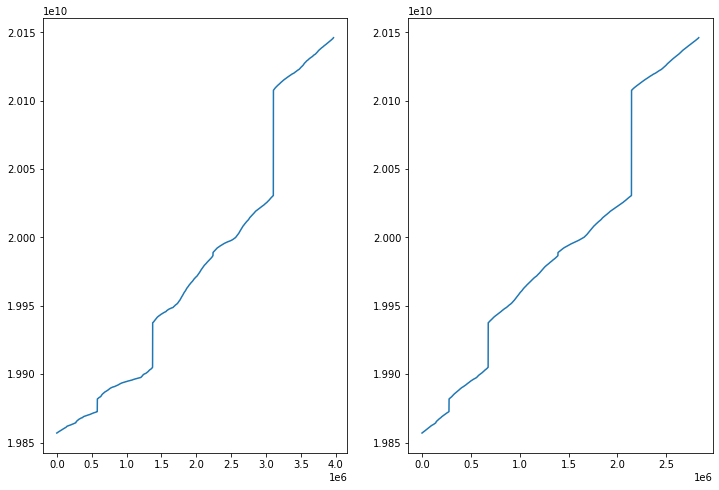

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].plot(orderbook_all.lastUpdatedId.to_list())
ax[1].plot(orderbook_all_active.lastUpdatedId.to_list())

In [55]:
id2 = np.array(orderbook_all.lastUpdatedId.to_list()[1:])
id1 = np.array(orderbook_all.lastUpdatedId.to_list()[:-1])

In [69]:
diff = id2-id1

print(f'mean: {np.mean(diff)}')
print(f'std: {np.std(diff)}')
print(f'min: {np.min(diff)}')

mean: 72.87618564313317
std: 42150.334508284424
min: 1


In [5]:
orderbook_all = pd.read_csv('./input_data/all/orderbook.csv')

In [3]:
orderbook_all['returns'] = (orderbook_all['w_midprice']-orderbook_all['w_midprice'].shift(1))/orderbook_all['w_midprice'].shift(1)
orderbook_all['log_returns'] = (np.log(orderbook_all['w_midprice'])-np.log(orderbook_all['w_midprice'].shift(1)))

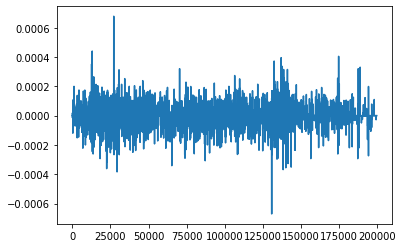

In [12]:
plt.plot(orderbook_all.log_returns[:200_000])

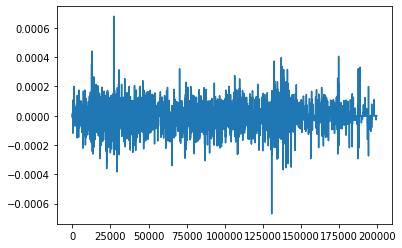

In [13]:
plt.plot(orderbook_all.returns[:200_000])

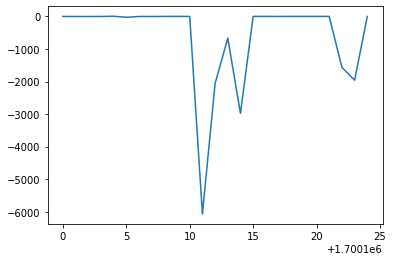

In [29]:
idx=1700000
plt.plot((orderbook_all.returns[idx+100:idx+125]/np.subtract(*np.percentile(orderbook_all.returns[idx:idx+100], [75, 25], axis=0)))-np.mean(orderbook_all.returns[idx:idx+100]))

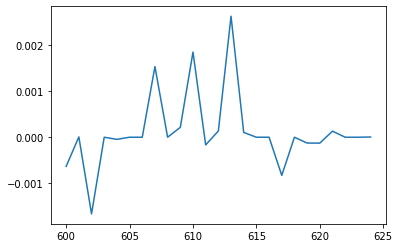

In [36]:
idx=500
plt.plot(orderbook_all.returns[idx+100:idx+125]/np.std(orderbook_all.returns[idx:idx+100])-np.median(orderbook_all.returns[idx:idx+100]))

In [8]:
orderbook = pd.read_csv('./input_data/all/orderbook.csv')

In [21]:
orderbook['rate_lag30'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-30))
orderbook['rate_lag15'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-15))
orderbook['rate_lag1'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-1))

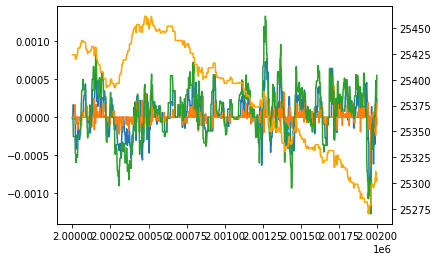

In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(orderbook.rate_lag1[2_000_000:2_002_000])
ax1.plot(orderbook.rate_lag15[2_000_000:2_002_000])
ax1.plot(orderbook.rate_lag30[2_000_000:2_002_000])
ax2.plot(orderbook.w_midprice[2_000_000:2_002_000], color='orange')

In [13]:
orderbook['returns_lag'] = np.log(orderbook['w_midprice'].shift(1)/orderbook['w_midprice'].shift(2))*10000
orderbook['mid_price_diff'] = orderbook['w_midprice']-orderbook['w_midprice'].shift(1)

In [19]:
orderbook_2 = orderbook[orderbook['mid_price_diff'] != 0]
orderbook_2.drop(columns=['returns_lag','mid_price_diff'], inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
orderbook_2

,datetime,lastUpdatedId,ask1,askqty1,ask2,askqty2,ask3,askqty3,ask4,askqty4,...,bidqty6,bid7,bidqty7,bid8,bidqty8,bid9,bidqty9,bid10,bidqty10,w_midprice
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-21 15:31:28.313,2022-07-21 15:31:28.313,21378204011,22414.86,0.05131,22414.93,0.00505,22415.09,0.00892,22415.30,0.03623,...,0.00446,22410.99,0.04460,22410.84,0.00892,22410.52,0.12000,22410.10,0.00471,22414.859745
2022-07-21 15:31:28.417,2022-07-21 15:31:28.417,21378204125,22416.02,0.00712,22416.03,0.05774,22416.68,0.22399,22416.69,0.21678,...,0.01847,22411.17,0.04307,22411.16,0.01000,22411.02,0.30000,22411.01,0.45169,22413.950394
2022-07-21 15:31:28.511,2022-07-21 15:31:28.511,21378204188,22414.93,0.60000,22415.60,0.00937,22416.02,0.00712,22416.68,0.22399,...,0.04271,22411.64,0.01847,22411.16,0.01000,22411.14,0.00606,22411.02,0.30000,22414.842262
2022-07-21 15:31:28.615,2022-07-21 15:31:28.615,21378204224,22414.92,0.01338,22414.93,0.59900,22415.60,0.00885,22416.02,0.00712,...,0.00088,22411.72,0.04000,22411.65,0.04271,22411.64,0.01847,22411.16,0.01000,22413.928131
2022-07-21 15:31:28.711,2022-07-21 15:31:28.711,21378204249,22414.28,0.50775,22414.92,0.02149,22414.93,0.59900,22415.60,0.00885,...,0.00999,22412.28,0.00088,22411.87,0.01113,22411.72,0.04000,22411.65,0.04271,22414.279857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22 15:31:47.501,2022-07-22 15:31:47.501,21419329950,23553.24,0.00084,23553.25,0.00129,23553.27,0.08964,23553.29,0.00800,...,0.00471,23550.49,0.01698,23550.48,0.18426,23550.41,0.00849,23549.86,0.00255,23552.560896
2022-07-22 15:31:47.602,2022-07-22 15:31:47.602,21419329982,23553.04,0.00083,23553.24,0.00084,23553.25,0.00084,23553.27,0.08964,...,0.03396,23550.48,0.18426,23550.41,0.00849,23549.86,0.00255,23549.51,0.00849,23551.671872
2022-07-22 15:31:47.707,2022-07-22 15:31:47.707,21419330018,23553.27,0.08961,23553.29,0.00800,23553.34,0.02246,23553.43,0.11020,...,0.00849,23550.55,0.04248,23550.54,0.00471,23550.50,0.00849,23550.49,0.03396,23552.604711


In [21]:
orderbook_2.to_csv('./input_data/all/orderbook_test.csv', index=False)

In [42]:
orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))

/var/folders/wh/v19kyh554sxg44m620vsh05c0000gn/T/ipykernel_57042/3076540589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))


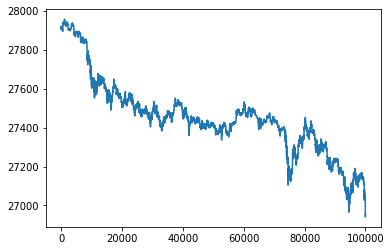

In [47]:
plt.plot(orderbook_2.w_midprice[1_000_000:1_100_000].to_list())

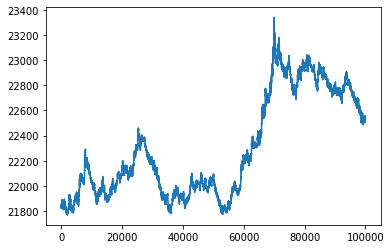

In [48]:
plt.plot(orderbook_2.w_midprice[2_000_000:2_100_000].to_list())